<a href="https://colab.research.google.com/github/anurag0078/deeplearing_assignments/blob/main/pima_indians_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from google.colab import drive
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_path="/content/gdrive/MyDrive/deep learning/assignment1/pima-indians-diabetes.csv"

In [ ]:
data = pd.read_csv(data_path,header=None)

In [ ]:
d1=data[8]
print(d1)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: 8, Length: 768, dtype: int64


In [ ]:
print(data)

      0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
..   ..  ...  ..  ..  ...   ...    ...  .. ..
763  10  101  76  48  180  32.9  0.171  63  0
764   2  122  70  27    0  36.8  0.340  27  0
765   5  121  72  23  112  26.2  0.245  30  0
766   1  126  60   0    0  30.1  0.349  47  1
767   1   93  70  31    0  30.4  0.315  23  0

[768 rows x 9 columns]


In [ ]:
train1 = data.drop(data.columns[8],axis=1)
labels = d1
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.20,random_state =2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
#from tensorflow.keras import initializers
model = Sequential()
# 0s 11ms/step - loss: 0.6076 - accuracy: 0.7671 - val_loss: 0.6042 - val_accuracy: 0.7727
#Epoch 00452: early stopping
model = Sequential()
model.add(Dense(120, input_dim=8, activation='relu', kernel_regularizer='l1'))
model.add(Dense(64, activation='relu', kernel_regularizer='l1'))

model.add(Dense(32, activation='relu', kernel_regularizer='l1'))

model.add(Dense(16, activation='relu', kernel_regularizer='l1'))
model.add(Dense(8, activation='relu', kernel_regularizer='l1'))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

with tf.device('/gpu:0'):
  history=model.fit(x=x_train,y=y_train.values,
            validation_data=(x_test,y_test.values),
            batch_size=128,epochs=1000,callbacks=[early_stop])

Epoch 1/1000
5/5 [==============================] - 1s 70ms/step - loss: 13.6233 - accuracy: 0.4544 - val_loss: 12.2784 - val_accuracy: 0.7078
Epoch 2/1000
5/5 [==============================] - 0s 14ms/step - loss: 12.1148 - accuracy: 0.6205 - val_loss: 11.6142 - val_accuracy: 0.6818
Epoch 3/1000
5/5 [==============================] - 0s 10ms/step - loss: 11.5288 - accuracy: 0.5798 - val_loss: 11.2377 - val_accuracy: 0.6688
Epoch 4/1000
5/5 [==============================] - 0s 9ms/step - loss: 11.1451 - accuracy: 0.6319 - val_loss: 10.8889 - val_accuracy: 0.7273
Epoch 5/1000
5/5 [==============================] - 0s 13ms/step - loss: 10.7930 - accuracy: 0.6433 - val_loss: 10.5537 - val_accuracy: 0.7078
Epoch 6/1000
5/5 [==============================] - 0s 10ms/step - loss: 10.4548 - accuracy: 0.6466 - val_loss: 10.2272 - val_accuracy: 0.7078
Epoch 7/1000
5/5 [==============================] - 0s 10ms/step - loss: 10.1275 - accuracy: 0.6531 - val_loss: 9.9066 - val_accuracy: 0.6883
E

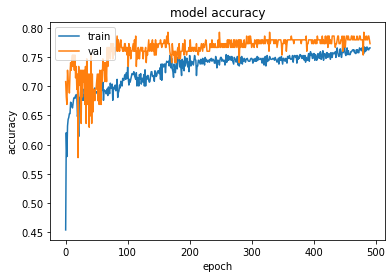

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import math

results = model.evaluate(x_test, y_test, batch_size=128)
yhat = model.predict(x_test)
mse = mean_squared_error(y_test, yhat)
rmse = math. sqrt(mse)
print(rmse)


2/2 [==============================] - 0s 7ms/step - loss: 0.6221 - accuracy: 0.7727
0.40031202041503006
